In [1]:
import pandas as pd
import math
import numpy as np
import itertools
import matplotlib.pyplot as plt

from pymatgen.io.ase import AseAtomsAdaptor
from pymatgen.core.periodic_table import Element
from ase.visualize.plot import plot_atoms

In [2]:
3.4972213391881724e-07/2.4

1.4571755579950718e-07

In [3]:
1.84/2.4

0.7666666666666667

In [4]:
def print_atom_structure(structure):
    ase_atoms = AseAtomsAdaptor.get_atoms(structure)
    fig, ax = plt.subplots()
    plt.xlabel("x coordinate (Å)")
    plt.ylabel("y coordinate (Å)")
    plot_atoms(ase_atoms, ax, radii=0.6, rotation=('14x, 0y, 0z'), show_unit_cell=True)
    plt.legend(labels=['Mo', 'S', 'W', 'Se'])
    # xlim = 40
    # ylim = 23
    # ax.set_xlim(-2, xlim)
    # ax.set_ylim(-2, ylim)

In [5]:
energyForS = 2.693
energyForMo = 7.097

In [6]:
class function_calc_lumo:
    def V_z_16_V_z_16_lumo(self, x1):
    
        # constant
        
        return  0.4404 +  ((np.cos(-1) + -1) / (((np.cos(-1) * x1) + (np.cos((x1 + x1)) + np.cos((x1 + x1)))) + (np.exp((x1 - 5)))))
       
    def V_z_42_V_z_42_lumo(self, x1):
        
        return 0
     
    def V_z_42_V_z_16_lumo(self, x1):
    
        return -0.1361 +  (np.cos(3) / ((5 * x1) + (10 * np.cos(((x1 / 3) + (x1 + 4))))))
    
    def Se_Se_lumo(self, x1):
    
        return 1.1193- 1/(81*x1)
    
    def Se_V_z_16_lumo(self, x1):
    
        return 0.4787 + np.cos(8)/(7*x1)
        
    def Se_V_z_42_lumo(self, x1):
    
        return  -0.1053 + (-1 + np.cos(x1)/x1)/np.exp(4)
        
    def W_W_lumo(self, x1):
    
        return 0
        
    def W_Se_lumo(self, x1):
    
        return 1.1044 + 1/(x1*np.exp(5))
        
    def W_V_z_42_lumo(self, x1):
        
        return 0
        
    def W_V_z_16_lumo(self, x1):
        
        return 0.4833 + (8/(x1 - pow(10, (6-x1)) - np.exp(6)))
    
    def __call__(self, defect_type1, defect_type2, distance, debug=False):
        all_funcs = [
             'Se_Se_lumo', # 0
             'Se_V_z_16_lumo', # 1
             'Se_V_z_42_lumo', # 2
             'V_z_16_V_z_16_lumo', # 3
             'V_z_42_V_z_16_lumo', # 4
             'V_z_42_V_z_42_lumo', # 5
             'W_Se_lumo', # 6
             'W_V_z_16_lumo', # 7
             'W_V_z_42_lumo', # 8
             'W_W_lumo', # 9
        ]
        defect_types = {
            0: 'V_z_16', 
            1: 'V_z_42', 
            2: 'Se', 
            3: 'W'
        }
        call_matrix = [
            [3, 4, 1, 7], 
            [4, 5, 2, 8], 
            [1, 2, 0, 6], 
            [7, 8, 6, 9]
        ]
        
        formation_consts = {
            'V_z_16': 0,
            'V_z_42': 0,
            'Se': 0,
            'W': 0,
        }
        if distance == 0.:
            return formation_consts[defect_types[defect_type1]]
        func_num = call_matrix[defect_type1][defect_type2]
        func = getattr(self, all_funcs[func_num])
        ans = func(distance)
        if debug:
            print(func_num, distance, ans)
        return ans



In [7]:
class function_calc_homo:
        #list of pair interucation found by segvae
    def V_z_16_V_z_16_homo(self, x1):
        
        # constant
        
        return  -0.5932 +   (3 / ((x1 - np.cos(x1)) - (7**2)))
       
    def V_z_42_V_z_42_homo(self, x1):
        
        return 0.025*x1 
     
    def V_z_42_V_z_16_homo(self, x1):
    
        return -0.4962 + ((x1 / -1) / (((4 + x1)**2) + (((6 - x1)**2) * 6)))
    
    def Se_Se_homo(self, x1):
    
        return -0.6915
    
    def Se_V_z_16_homo(self, x1):
    
        return -0.6595 - 1/(100-x1)
        
    def Se_V_z_42_homo(self, x1):
    
        return  -0.4074 - 6/(54+2*x1+pow(10,(5-x1)))
        
    def W_W_homo(self, x1):
    
        return 1.7985 + 0*x1
        
    def W_Se_homo(self, x1):
    
        return -0.6993
        
    def W_V_z_42_homo(self, x1):
        
        return 0.356+ 0.0008*(x1-10)
        
    def W_V_z_16_homo(self, x1):
        
        return -0.6778 + (np.cos(8)/(3*x1))
    
    def __call__(self, defect_type1, defect_type2, distance, debug=False):
        all_funcs = [
             'Se_Se_homo', # 0
             'Se_V_z_16_homo', # 1
             'Se_V_z_42_homo', # 2
             'V_z_16_V_z_16_homo', # 3
             'V_z_42_V_z_16_homo', # 4
             'V_z_42_V_z_42_homo', # 5
             'W_Se_homo', # 6
             'W_V_z_16_homo', # 7
             'W_V_z_42_homo', # 8
             'W_W_homo', # 9
        ]
        defect_types = {
            0: 'V_z_16', 
            1: 'V_z_42', 
            2: 'Se', 
            3: 'W'
        }
        call_matrix = [
            [3, 4, 1, 7], 
            [4, 5, 2, 8], 
            [1, 2, 0, 6], 
            [7, 8, 6, 9]
        ]
        
        formation_consts = {
            'V_z_16': 0,
            'V_z_42': 0,
            'Se': 0,
            'W': 0,
        }
        if distance == 0.:
            return formation_consts[defect_types[defect_type1]]
        func_num = call_matrix[defect_type1][defect_type2]
        func = getattr(self, all_funcs[func_num])
        ans = func(distance)
        if debug:
            print(func_num, distance, ans)
        return ans

In [8]:
class function_calc:
    def V_z_16_V_z_16(self, x1):
        
        # constant
        
        return  0 - 1/(15+2*x1)
    
    def V_z_42_V_z_42(self, x1):
        
        #0
        
        return (8 / ((np.cos(np.cos(x1)) * np.cos(np.cos(x1))) - (np.exp(x1))))
    
    def V_z_42_V_z_16(self, x1):
    
        return 0 + (((x1 * (np.cos(0.5) * ((np.cos(((0.5 * (4 * (x1 * (4 - x1)))) / x1)) * x1) / x1))) - x1) / ((np.exp(x1)) / x1))
    
    def Se_Se(self, x1):
    
        return 0 +   ((((5 / x1) * 7) - (2 * 9)) / (np.exp(8)))
    
    def Se_V_z_16(self, x1):
    
        return 0 +   (3 / ((x1 / (3 - x1)) - (8**2)))
    
    def Se_V_z_42(self, x1):
    
        return  0 +   (((x1 / np.cos(2)) / 2) / (np.exp((x1 + 1))))
    
    def W_W(self, x1):
    
        #0
        
        return (np.cos(((np.cos(2) * np.cos(2)) * x1)) / (x1 * ((np.exp(x1)) * x1)))
    
    def W_Se(self, x1):
    
        return 0 +   ((-1 - (3 / (x1 - (x1**2)))) / (8**2))
    
    def W_V_z_42(self, x1):
        
        #0
        
        return (np.cos((x1 - (np.cos(7) * np.cos(7)))) / ((np.exp(x1)) + -1))
    
    def W_V_z_16(self, x1):
        
        return 0 +   (((2 - x1) / (7**2)) / x1)
    
    def __call__(self, defect_type1, defect_type2, distance, debug=False):
        all_funcs = [
            'Se_Se', # 0
            'Se_V_z_16', # 1
            'Se_V_z_42', # 2
            'V_z_16_V_z_16', # 3
            'V_z_42_V_z_16', # 4
            'V_z_42_V_z_42', # 5
            'W_Se', # 6
            'W_V_z_16', # 7
            'W_V_z_42', # 8
            'W_W' # 9
        ]
        defect_types = {
            0: 'V_z_16', 
            1: 'V_z_42', 
            2: 'Se', 
            3: 'W'
        }
        call_matrix = [
            [3, 4, 1, 7], 
            [4, 5, 2, 8], 
            [1, 2, 0, 6], 
            [7, 8, 6, 9]
        ]
        
        formation_consts = {
            'V_z_16': 2.645686,
            'V_z_42': 7.121477,
            'Se': 0.278959,
            'W': 0.166689,
        }
        if distance == 0.:
            return formation_consts[defect_types[defect_type1]]
        func_num = call_matrix[defect_type1][defect_type2]
        func = getattr(self, all_funcs[func_num])
        ans = func(distance)
        if debug:
            print(func_num, distance, ans)
        return ans

In [9]:
class function_calc_gap:
    def __init__(self, homo, lumo):
        self.homo = homo
        self.lumo = lumo
    
    def __call__(self, defect_type1, defect_type2, distance, debug=False):
        return abs(self.homo(defect_type1, defect_type2, distance, debug) - self.lumo(defect_type1, defect_type2, distance, debug))

In [10]:
eval_fn_homo = function_calc_homo()
eval_fn_lumo = function_calc_lumo()
eval_fn_gap = function_calc_gap(eval_fn_homo, eval_fn_lumo)

In [11]:
empty_pickle = pd.read_pickle('emptydata.pkl')
empty_pickle = empty_pickle.iloc[0]
structure = empty_pickle.initial_structure.copy()

In [13]:
scale_x = 2
scale_y = 2

In [14]:
structure.make_supercell([scale_x, scale_y, 1])

/home/lepip/.local/lib/python3.8/site-packages/pymatgen/core/structure.py:757: UserWarning: Not all sites have property was. Missing values are set to None.
  warnings.warn(f"Not all sites have property {k}. Missing values are set to None.")


In [15]:
len(structure)

768

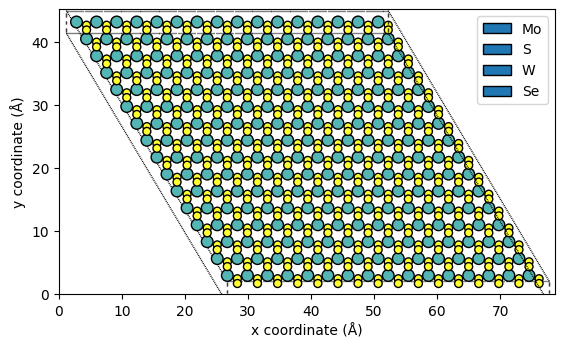

In [16]:
print_atom_structure(structure)

In [17]:
from oper import Defect, DefectSet, TopBatch, RandomBatch, BatchOper, EvalFunction

In [18]:
def get_atom(structure, matrices, defect):
    defect_pos = matrices[defect.cords[0]][defect.cords[1]][defect.cords[2]][2]
    atom = structure[int(defect_pos)]
    return atom

In [19]:
def is_Mo(atom):
    return atom.species.as_dict()['Mo'] == 1.0

def is_S1(atom):
    return abs(atom.frac_coords[2] -  0.144826) < 1e-5

def is_S2(atom):
    return abs(atom.frac_coords[2] - 0.355174) < 1e-5

In [20]:
def get_atom_id(atom):
    if is_S1(atom):
        return 0
    if is_Mo(atom):
        return 1
    if is_S2(atom):
        return 2
    raise ValueError(f"atom {atom.frac_coords} is not defined")

atom_types = [0, 1, 2]

In [21]:
def sort_func(elem):
    return elem[1], elem[0], elem[2]

In [22]:
def get_matrices_MoS2(structure):
    matrices = [[], [], []]
    for idx, atom in enumerate(structure):
        matrices[get_atom_id(atom)].append([atom.coords[0], atom.coords[1], idx])
    for matrix in matrices:
        matrix.sort(key=sort_func)
    matrices = np.array(matrices).reshape(3, 8*scale_x, 8*scale_y, 3)
    return matrices

In [23]:
matrices = get_matrices_MoS2(structure)

In [24]:
def calc_distance_with_repeat(atom1, atom2):
    return atom1.distance(atom2)
    
def calc_distance(atom1, atom2):
    x = (atom1.coords[0] - atom2.coords[0]) ** 2
    y = (atom1.coords[1] - atom2.coords[1]) ** 2
    z = (atom1.coords[2] - atom2.coords[2]) ** 2
    distance = math.sqrt(x + y + z)
    return distance

In [25]:
def get_energy(structure, matrices, defect_set, function_set, debug=False):
    energy = 0
    for defect1, defect2, in itertools.combinations_with_replacement(list(defect_set), 2):
        atom1 = get_atom(structure, matrices, defect1)
        atom2 = get_atom(structure, matrices, defect2)
        distance = calc_distance(atom1, atom2)
        energy += function_set(defect1.type, defect2.type, distance, debug)
    return energy

In [26]:
def get_homo_lumo(structure, matrices, defect_set, function_set, debug=False):
    energy = 1e9
    for defect1, defect2, in itertools.combinations_with_replacement(list(defect_set), 2):
        atom1 = get_atom(structure, matrices, defect1)
        atom2 = get_atom(structure, matrices, defect2)
        distance = calc_distance(atom1, atom2)
        if distance < 0.01:
            continue
        energy = min(energy, function_set(defect1.type, defect2.type, distance, debug))
    return energy

In [27]:
function_set = function_calc()

In [28]:
eval_function = EvalFunction(get_energy, structure, matrices, function_set)

In [29]:
eval_function_gap = EvalFunction(get_homo_lumo, structure, matrices, eval_fn_gap)

In [30]:
%load_ext autoreload
%autoreload 2

In [31]:
def possible_moves(defect, max_range=1):
    if defect.type == 0 or defect.type == 2:
        return [0, 2], list(range(-max_range, max_range + 1)), list(range(-max_range, max_range + 1))
    if defect.type == 1 or defect.type == 3:
        return [1], list(range(-max_range, max_range + 1)), list(range(-max_range, max_range + 1))

In [32]:
def get_possible_positions(structure, matrices, defect, defect_set, max_range=1):
    possible_positions = []
    for move in itertools.product(*possible_moves(defect, max_range)):
        position = [move[0], defect.cords[1] + move[1], defect.cords[2] + move[2]]
        if not 0 <= position[1] < matrices[position[0]].shape[0]:
            continue
        if not 0 <= position[2] < matrices[position[0]].shape[1]:
            continue
        if Defect(cords=tuple(position)) in defect_set:
            continue
        possible_positions.append(position)
    return possible_positions

In [33]:
import random


def upd_defect_set(structure, matrices, defect_set, max_range=1):
    random_defect = random.sample(defect_set.defect_set, 1)[0]
    defect_set = defect_set.copy()
    defect_set.remove_defect(random_defect)
    possible_positions = get_possible_positions(structure, matrices, random_defect, defect_set, max_range)
    new_sets = []
    for position in possible_positions:
        new_set = defect_set.copy()
        new_set.add_defect(Defect(type=random_defect.type, cords=tuple(position)))
        new_sets.append(new_set)
    return new_sets

In [34]:
target=0

In [35]:
def random_position_in_center(defect_type):
    layer = 100
    if defect_type == 0 or defect_type == 2:
        layer = random.choice([0, 2])
    if defect_type == 1 or defect_type == 3:
        layer = 1
    x_len = matrices[layer].shape[0]
    y_len = matrices[layer].shape[1]
    x = random.choice(range(x_len//2-4, x_len//2+4))
    y = random.choice(range(y_len//2-4, y_len//2+4))
    return layer, x, y

In [36]:
def random_defects(empty_set, defects):
    new_set = empty_set.copy()
    for defect_type in defects:
        for i in range(defects[defect_type]):
            defect = Defect(defect_type, random_position_in_center(defect_type))
            while defect in new_set:
                defect = Defect(defect_type, random_position_in_center(defect_type))
            new_set.add_defect(defect)
    return new_set

In [37]:
def upd_defect(structure, matrices, defect_set, defect, max_range=16):
    random_defect = defect
    defect_set = defect_set.copy()
    defect_set.remove_defect(random_defect)
    possible_positions = get_possible_positions(structure, matrices, random_defect, defect_set, max_range)
    new_sets = []
    for position in possible_positions:
        new_set = defect_set.copy()
        new_set.add_defect(Defect(type=random_defect.type, cords=tuple(position)))
        new_sets.append(new_set)
    return new_sets

In [38]:
def last_step_optimize(structure, matrices, best_set, max_range=16, target_energy=0):
    top_batch_oper = BatchOper([TopBatch(1)], target_energy=target_energy)
    current_set = best_set.copy()
    for defect in best_set:
        new_sets = upd_defect(structure, matrices, current_set, defect, max_range)
        top_batch_oper.process_members(new_sets)
        current_set = top_batch_oper[0].members[0]
    return current_set

In [39]:
def mutate(defect_set):
    random_defect = random.sample(defect_set.defect_set, 1)[0]
    defect_set = defect_set.copy()
    defect_set.remove_defect(random_defect)
    possible_positions = get_possible_positions(structure, matrices, random_defect, defect_set, 1)
    position = random.choice(possible_positions)
    new_defect = Defect(type=random_defect.type, cords=tuple(position))
    defect_set.add_defect(new_defect)
    return defect_set

In [40]:
def greedy_mutate(defect_set):
    return last_step_optimize(structure, matrices, defect_set, max_range=8)

In [41]:
def step_optimize(structure, matrices, batch_op, max_range=1):
    new_sets = []
    for defect_set in batch_op:
        new_sets.extend(upd_defect_set(structure, matrices, defect_set, max_range))
    batch_op.process_members(new_sets)
    for i in range(5):
        batch_op[2].mutate(mutate)
    # if random.random() < 0.4:
    #     batch_op[2].mutate(greedy_mutate)
    energies = []
    for defect_set in batch_op:
        energies.append(defect_set.get_energy())
    return np.mean(energies), np.min(energies)

In [42]:
def create_printable_structure_MoS2(structure, defects):
    matrices = get_matrices_MoS2(structure)
    ans = structure.copy()
    to_delete = []
    for defect in defects:
        defect_id = int(matrices[defect.cords[0]][defect.cords[1]][defect.cords[2]][2])
        if defect.type == 0 or defect.type == 1:
            to_delete.append(defect_id)
        if defect.type == 2:
            ans.replace(defect_id, Element('Se'))
        if defect.type == 3:
            ans.replace(defect_id, Element('W'))
    ans.remove_sites(to_delete)
    return ans

In [43]:
batch_op = BatchOper([TopBatch(10), RandomBatch(15), TopBatch(9)], target_energy=0)
empty_set = DefectSet(eval_function)
defects = {
    0: 2,
    1: 2,
    2: 2,
    3: 2,
}
sets = []
for i in range(5):
    initial_set = random_defects(empty_set, defects)
    sets.append(initial_set)    
batch_op.process_members(sets)

In [44]:
for set in batch_op:
    print(set.get_energy())

2.2592528811240964
2.5020419748979874
2.2592528811240964


In [92]:
energies_mean = []
energies_min = []
for i in range(40):
    mean_energy, min_energy = step_optimize(structure, matrices, batch_op)
    energies_mean.append(mean_energy)
    energies_min.append(min_energy)

Text(0, 0.5, 'Defect interaction energy (eV)')

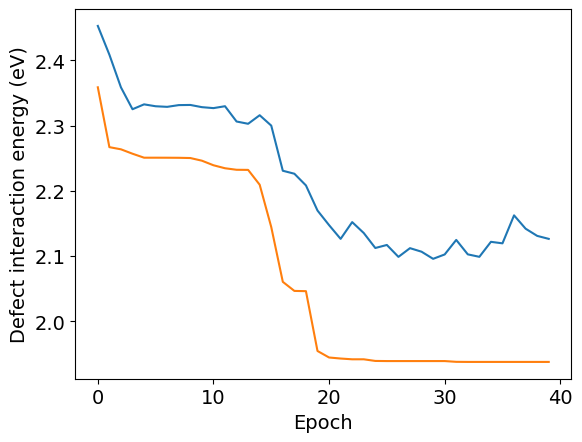

In [95]:
plt.plot(energies_mean)
plt.plot(energies_min)
plt.xlabel('Epoch')
plt.ylabel('Defect interaction energy (eV)')

TypeError: 'TopBatch' object is not subscriptable

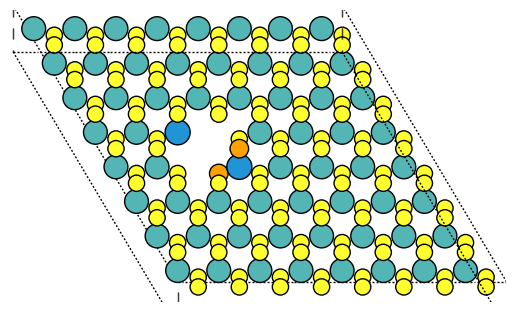

In [94]:
print_atom_structure2(create_printable_structure_MoS2(structure, batch_op[0].members[1]))

In [148]:
import time
best_sets = []
best_sets_baseline = []
start_time = time.time()
target = 0
variations = 5
for i in range(variations):
    batch_op = BatchOper([TopBatch(10), RandomBatch(15), TopBatch(9)], target_energy=target)
    empty_set = DefectSet(eval_function_gap)
    defects = {
        0: 2,
        1: 4,
        2: 2,
        3: 2,
    }
    for j in range(5):
        initial_set = random_defects(empty_set, defects)
        sets.append(initial_set)
    best_sets_baseline.append(last_step_optimize(structure, matrices, initial_set, target_energy=target).get_energy())
    batch_op.process_members([initial_set])
    for j in range(20):
        _, _ = step_optimize(structure, matrices, batch_op)
    best_sets.append(batch_op[0].members[0])
print('Elapsed time: ', time.time() - start_time)
print('Time per one optimization: ', (time.time() - start_time)/variations)
for i in range(len(best_sets)):
    best_sets[i] = last_step_optimize(structure, matrices, best_sets[i], target_energy=target)

Elapsed time:  18.41387701034546
Time per one optimization:  3.682796907424927


In [151]:
0.0003492949668597145/2.4

0.00014553956952488106

In [123]:
energies = []
for i in range(len(best_sets)):
    print(best_sets[i].get_energy())
    energies.append(best_sets[i].get_energy())

0.019939473390859663
0.019939473390859646
0.01993947339085967
0.019939473390859663
0.019939473390859646
0.01993947312500001
0.019939473390859663
0.01993947312500001
0.019939473390859646
0.019939473390859646
0.019939473390859653
0.019939473390859646
0.01993947312500001
0.019939473390859663
0.019939473390859663
0.019939473390859663
0.01993947312500001
0.019939473390859642
0.019939473390859653
0.019939473390859663
0.01993947312500001
0.01993947339085967
0.01993947339085967
0.01993947312500001
0.019939473390859646
0.01993947312500001
0.01993947312500001
0.01993947312500001
0.01993947312500001
0.01993947312500001


In [124]:
for i in range(5):
    print(best_sets[i*4].get_energy())

0.019939473390859663
0.019939473390859646
0.019939473390859646
0.01993947312500001
0.01993947312500001


In [82]:
def print_atom_structure2(structure):
    ase_atoms = AseAtomsAdaptor.get_atoms(structure)
    fig, ax = plt.subplots()
    plt.axis('off')
    #plt.xlabel("x coordinate (Å)")
    #plt.ylabel("y coordinate (Å)")
    plot_atoms(ase_atoms, ax, radii=0.6, rotation=('14x, 0y, 0z'), show_unit_cell=True)
    #plt.legend(labels=['Mo', 'S', 'W', 'Se'])
    # xlim = 40
    # ylim = 23
    # ax.set_xlim(-2, xlim)
    # ax.set_ylim(-2, ylim)

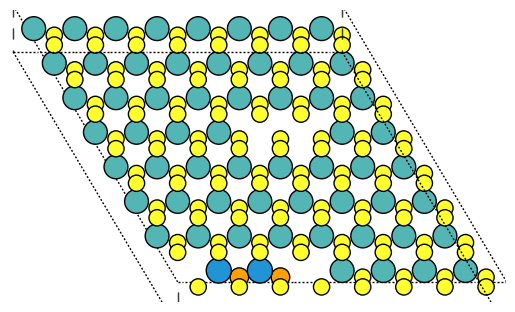

In [149]:
print_atom_structure2(create_printable_structure_MoS2(structure, best_sets[1]))

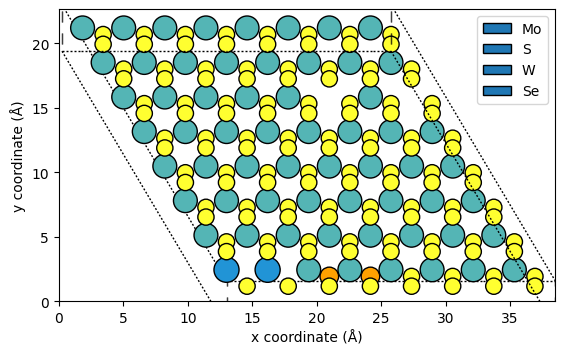

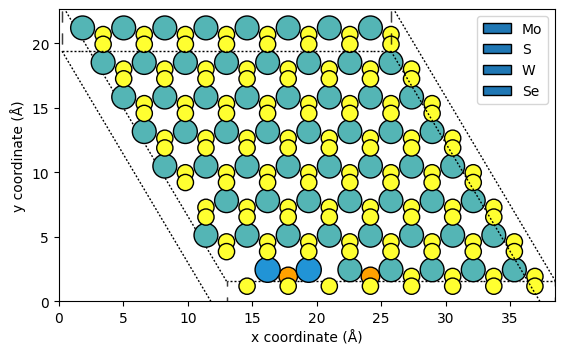

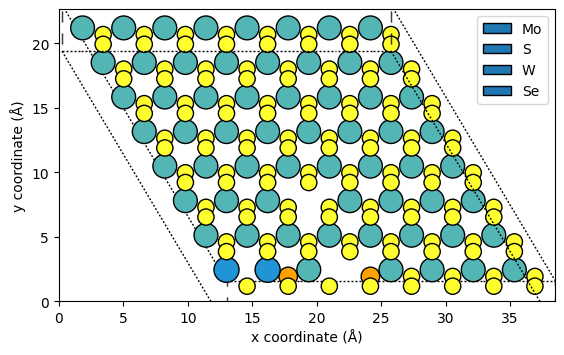

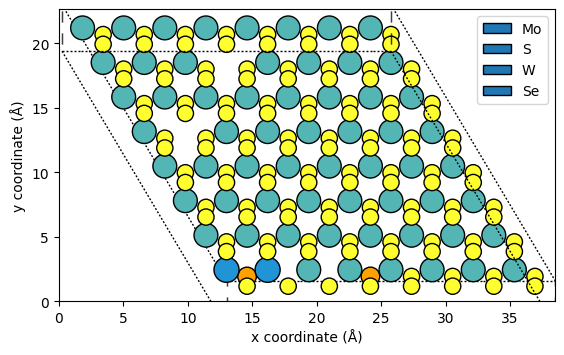

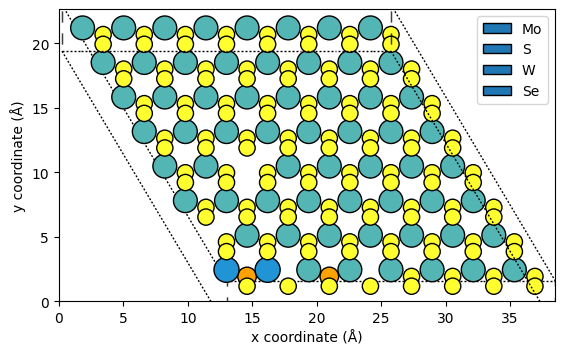

In [125]:
for i in range(5):
    print_atom_structure(create_printable_structure_MoS2(structure, best_sets[i*4]))

In [126]:
distances = [abs(energy - target) for energy in energies]
baseline_distances = [abs(energy - target) for energy in best_sets_baseline]
# sorted_indices = sorted(range(len(distances)), key=lambda i: distances[i], reverse=True)
# filtered_indices = sorted_indices[10:]
# filtered_energies = [energies[i] for i in filtered_indices]
# print(filtered_energies)

In [127]:
best_sets_baseline.__len__()

30

In [128]:
best_sets_baseline

[0.019939473390859663,
 0.01993947312500001,
 0.019939473125000003,
 0.019939473125000013,
 0.01993947312500001,
 0.01993947312500001,
 0.019939473390859646,
 0.019939473390859646,
 0.019939473125000013,
 0.01993947312500001,
 0.019939473390859653,
 0.01993947312500001,
 0.019939473390859646,
 0.019939473390859663,
 0.019939473390859646,
 0.01993947312500001,
 0.01993947312500001,
 0.019939473390859642,
 0.019939473390859646,
 0.019939473390859653,
 0.01993947312500001,
 0.019939473390859646,
 0.01993947339085967,
 0.01993947312500001,
 0.01993947312500001,
 0.019939473390859642,
 0.01993947312500001,
 0.01993947312500001,
 0.01993947312500001,
 0.01993947312500001]

In [129]:
energies

[0.019939473390859663,
 0.019939473390859646,
 0.01993947339085967,
 0.019939473390859663,
 0.019939473390859646,
 0.01993947312500001,
 0.019939473390859663,
 0.01993947312500001,
 0.019939473390859646,
 0.019939473390859646,
 0.019939473390859653,
 0.019939473390859646,
 0.01993947312500001,
 0.019939473390859663,
 0.019939473390859663,
 0.019939473390859663,
 0.01993947312500001,
 0.019939473390859642,
 0.019939473390859653,
 0.019939473390859663,
 0.01993947312500001,
 0.01993947339085967,
 0.01993947339085967,
 0.01993947312500001,
 0.019939473390859646,
 0.01993947312500001,
 0.01993947312500001,
 0.01993947312500001,
 0.01993947312500001,
 0.01993947312500001]

In [130]:
min(energies)

0.01993947312500001

In [131]:
def get_statistics(energies):
    print(f'min error: {min(energies)}')
    print(f'mean error: {np.mean(energies)}')
    print(f'std deviation: {np.std(energies)}')

In [132]:
get_statistics(distances)

min error: 0.0013135266091403308
mean error: 0.0013135267066222151
std deviation: 1.281162777661985e-10


In [133]:
get_statistics(baseline_distances)

min error: 0.0013135266091403308
mean error: 0.0013135267597941468
std deviation: 1.3174292356933093e-10


In [134]:
np.mean(baseline_distances) - np.mean(distances)

5.3171931701373465e-11

In [58]:
get_statistics(energies)

In [59]:
get_statistics(best_sets_baseline)

min energy: 1.9393861211498966
mean energy: 1.9978132565974605
std deviation: 0.05736076467783312


In [55]:
min(best_sets_baseline)

1.9393861211498966

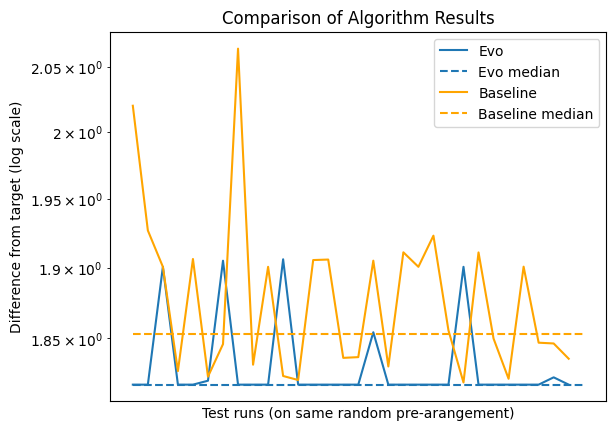

In [51]:
import matplotlib.pyplot as plt

# Define the labels for the x-axis
labels = [str(i) for i in range(len(distances))]
# ax1 = plt.axes()
# x_axis = ax1.axes.get_xaxis()
# x_axis.set_visible(False)
# Create the bar chart
plt.plot(np.array(distances), label='Evo')
plt.hlines(np.median(distances), xmin=0, xmax=len(distances), label='Evo median', linestyles='dashed')
plt.plot(np.array(baseline_distances), label='Baseline', color='orange')
plt.hlines(np.median(baseline_distances), xmin=0, xmax=len(distances), label='Baseline median', linestyles='dashed', color='orange')
plt.yscale("log")
# Add axis labels and a title
plt.xlabel('Test runs (on same random pre-arangement)')
plt.ylabel('Difference from target (log scale)')
plt.title('Comparison of Algorithm Results')
plt.xticks([], [])
# Add a legend
plt.legend()
# Show the chart
plt.show()

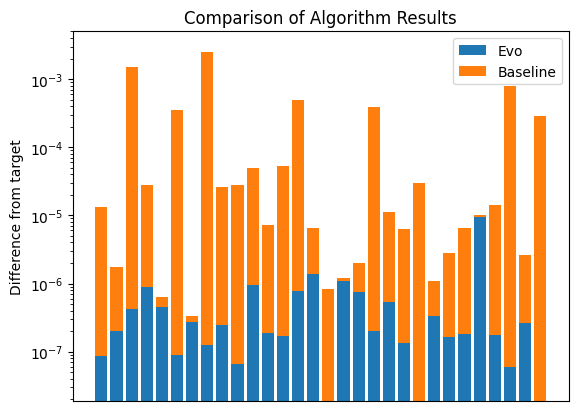

In [67]:
import matplotlib.pyplot as plt

# Define the labels for the x-axis
labels = [str(i) for i in range(len(distances))]
ax1 = plt.axes()
x_axis = ax1.axes.get_xaxis()
x_axis.set_visible(False)
# Create the bar chart
plt.bar(labels, np.array(distances), label='Evo')
plt.bar(labels, np.array(baseline_distances), bottom=np.array(distances), label='Baseline')
plt.yscale("log")
# Add axis labels and a title
plt.xlabel('Data Points')
plt.ylabel('Difference from target')
plt.title('Comparison of Algorithm Results')

# Add a legend
plt.legend()
# Show the chart
plt.show()


In [68]:
min(distances)

1.8503056864460632e-09

In [69]:
min(baseline_distances)

5.907546496430882e-08

In [152]:
1.31e-3/0.4125

0.0031757575757575757

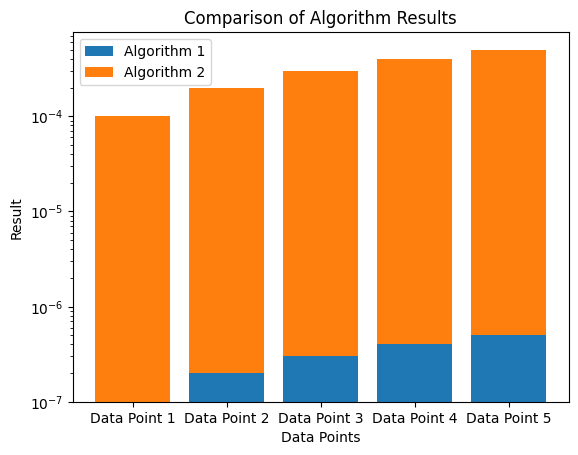

In [70]:
import matplotlib.pyplot as plt

# Define the data for the two algorithms
algorithm_1 = [1e-7, 2e-7, 3e-7, 4e-7, 5e-7]
algorithm_2 = [1e-4, 2e-4, 3e-4, 4e-4, 5e-4]

# Define the labels for the x-axis
labels = ['Data Point 1', 'Data Point 2', 'Data Point 3', 'Data Point 4', 'Data Point 5']

# Create the bar chart
plt.bar(labels, algorithm_1, label='Algorithm 1')
plt.bar(labels, algorithm_2, bottom=algorithm_1, label='Algorithm 2')

# Set the y-axis to a logarithmic scale
plt.yscale('log')

# Add axis labels and a title
plt.xlabel('Data Points')
plt.ylabel('Result')
plt.title('Comparison of Algorithm Results')

# Add a legend
plt.legend()

# Show the chart
plt.show()

NameError: name 'filtered_energies' is not defined

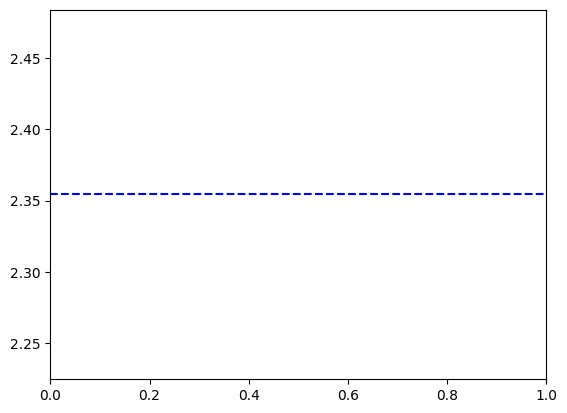

In [71]:
plt.figure()
plt.axhline(y=target, color='blue', linestyle='--', label='Target value')
plt.scatter(np.arange(len(filtered_energies)), filtered_energies, marker='o', s=8, c='red', label='HOMO-LUMO gap')
plt.xticks([])
plt.ylabel('Deviation from target')
plt.legend()
plt.show()
# Добавьте горизонтальную линию, соответствующую заданному значению (2.20)


In [148]:
def array_to_dict(arr):
    return {i: arr[i] for i in range(len(arr))}
def generate_random_sum_set(k, n):
    if k == 1:
        return np.array([n])
    n += k
    dividers = np.sort(np.random.choice(range(1, n), k - 1, replace=False))
    result = np.diff(np.concatenate(([0], dividers, [n])))
    result -= 1
    return array_to_dict(result)


In [180]:
max_number_of_defects = 30
number_of_structs = 20
empty_set = DefectSet(eval_function)
test_structures = []
for number_of_defects in range(1, max_number_of_defects + 1):
    test_structures.append([])
    for struct_id in range(1, number_of_structs + 1):
        defects = generate_random_sum_set(4, number_of_defects)
        structure = random_defects(empty_set, defects)
        test_structures[number_of_defects-1].append(structure)

In [181]:
def get_energy_reg(structure):
    return structure.get_energy()

In [182]:
import time

def evaluate_estimator(test_structures, get_energy):
    rows = len(test_structures)
    cols = len(test_structures[0])
    times = np.empty((rows, cols))
    for i in range(rows):
        for j in range(cols):
            start_time = time.time()
            for k in range(10):
                get_energy(test_structures[i][j])
            stop_time = time.time()
            times[i, j] = (stop_time - start_time)/10
    row_averages = np.mean(times, axis=1)
    row_std_devs = np.std(times, axis=1)
    import matplotlib.pyplot as plt
    row_numbers = np.arange(len(row_averages))
    plt.errorbar(row_numbers+1, row_averages, yerr=row_std_devs, fmt='o', capsize=5)
    plt.xlabel('Number of defects')
    plt.ylabel('Average Time with Standard Deviation')
    plt.title('Average Time with Standard Deviation for Each Row')
    plt.show()

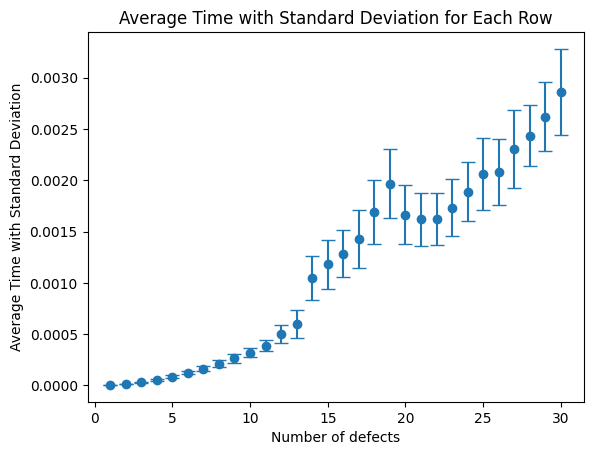

In [183]:
evaluate_estimator(test_structures, get_energy_reg)

In [ ]:
print((7.2740771770477295/100)/(0.0156400203704834/b))

In [ ]:
plt.plot(np.array(energies_mean), label='mean')
plt.plot(np.array(energies_min), label='min')
plt.title("Mean humo-lump gap step by step")
plt.legend()
plt.show()

In [136]:
best_set = batch_op[0].members[0]

In [ ]:
best_set

In [ ]:
best_set.get_energy()

In [ ]:
better_set2.get_energy()

In [ ]:
better_set2 = last_step_optimize(structure, matrices, batch_op[0].members[1])

In [ ]:
print_atom_structure(create_printable_structure_MoS2(structure, better_set2))

In [145]:
better_set = last_step_optimize(structure, matrices, best_set)

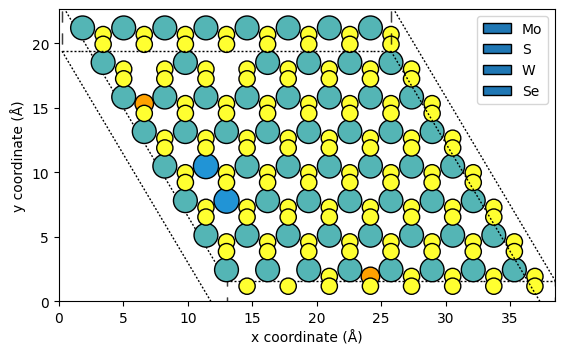

In [139]:
print_atom_structure(create_printable_structure_MoS2(structure, best_set))

In [152]:
better_set2 = last_step_optimize(structure, matrices, better_set)

In [155]:
better_set

{[1,(1, 8, 8)], [1,(1, 8, 7)], [3,(1, 9, 8)], [0,(0, 8, 7)], [0,(2, 8, 7)], [2,(0, 9, 8)], [2,(2, 9, 7)], [3,(1, 7, 7)]}

In [147]:
print(best_set.get_energy() - better_set.get_energy())

0.003581026884629912


In [153]:
print(best_set.get_energy() - better_set2.get_energy())

0.003581026884629912


In [148]:
better_set

{[1,(1, 8, 8)], [1,(1, 8, 7)], [3,(1, 9, 8)], [0,(0, 8, 7)], [0,(2, 8, 7)], [2,(0, 9, 8)], [2,(2, 9, 7)], [3,(1, 7, 7)]}

7 7
8 7
8 8


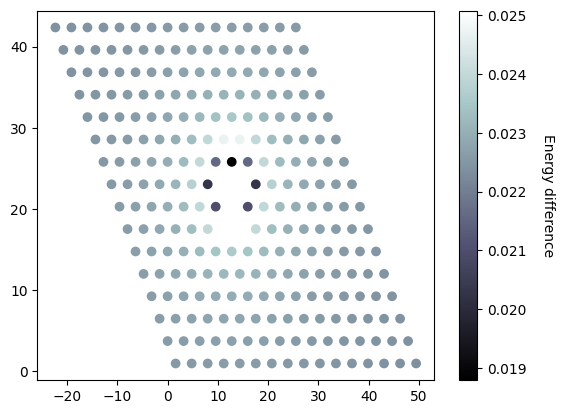

In [149]:
import matplotlib.pyplot as plt
import numpy as np

array_3d = matrices[0]

x = [item[0] for sublist in array_3d for item in sublist]
y = [item[1] for sublist in array_3d for item in sublist]

cell_coords = np.indices(array_3d.shape[:2]).reshape(2, -1).T

cel_c = []
cur_set = better_set.copy()
defect = Defect(3,(1, 9, 8))
cur_set.remove_defect(defect)
grub = []
for idx, (cell_x, cell_y) in enumerate(cell_coords):
    try:
        cur_set.add_defect(Defect(defect.type, (defect.cords[0], cell_x, cell_y)))
    except:
        print(cell_x, cell_y)
        grub.append(0)
        cel_c.append(0)
        continue
    grub.append(np.sqrt((cell_x-40)**2 + (cell_y-18)**2))
    cel_c.append(cur_set.get_energy())
    cur_set.remove_defect(Defect(defect.type,(defect.cords[0], cell_x, cell_y)))
cel_c = np.array(cel_c)
mean_thing = np.mean(cel_c)
cel_c[cel_c>0] -= np.mean(cel_c)
cel_c[cel_c==0] = np.max(cel_c)
# print(cel_c-np.mean(cel_c))
plt.scatter(x, y, c=cel_c, cmap='bone')
cbar = plt.colorbar()
cbar.set_label('Energy difference', rotation=270, labelpad=20)
plt.show()

In [130]:
cur_set.add_defect(Defect(defect.type, (defect.cords[0], 0, 15)))

In [131]:
cur_set.get_energy()-mean_thing

0.02237063626666269

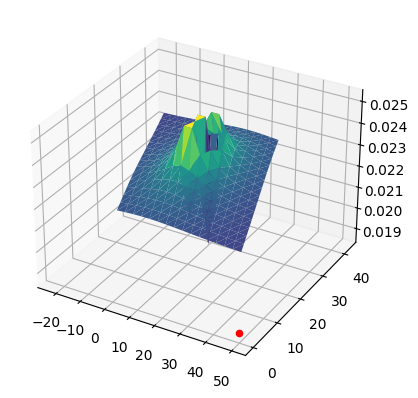

In [151]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_trisurf(x, y, cel_c, cmap='viridis')
ax.scatter(50, 0, better_set.get_energy()-mean_thing, c='red', marker='o', label='Point of interest')
plt.show()

In [438]:
grub = [i for i in grub if i != 0]
cel_c = [i for i in cel_c if i != 0]

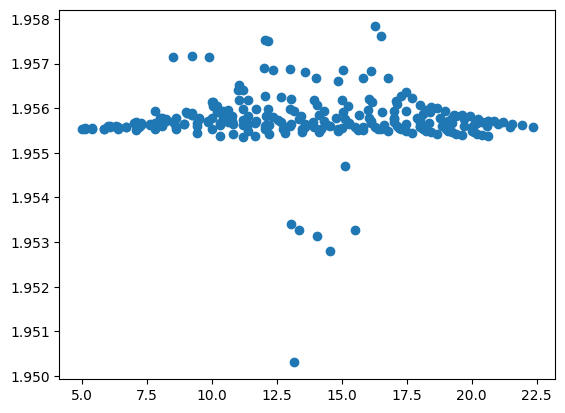

In [439]:
plt.scatter(grub, cel_c)

In [423]:
print(np.mean(list(i for i in cel_c if i!=0)))

1.955732231082909


In [45]:
all_funcs = [
            'Se_Se', # 0
            'Se_V_z_16', # 1
            'Se_V_z_42', # 2
            'V_z_16_V_z_16', # 3
            'V_z_42_V_z_16', # 4
            'V_z_42_V_z_42', # 5
            'W_Se', # 6
            'W_V_z_16', # 7
            'W_V_z_42', # 8
            'W_W' # 9
        ]
abiba = function_calc()
function_calc.__getattribute__(abiba, all_funcs[0])(2)

-0.00016773131395125593

In [46]:
dists = []
for atom in structure:
    for atom2 in structure:
        if atom != atom2:
            dists.append(calc_distance(atom, atom2))

-0.9781522312797011 -8.903077037562565e-09


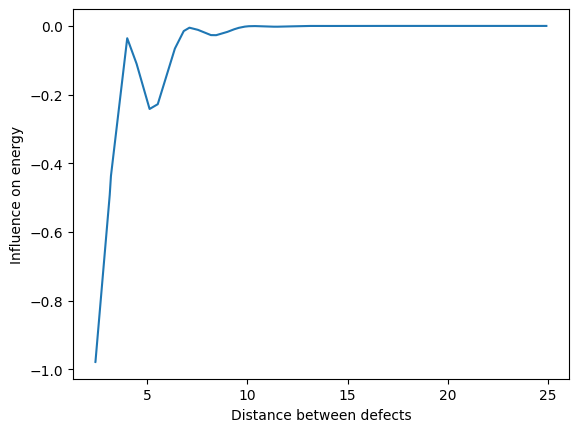

In [47]:
values = []
dists2 = [i for i in dists if i < 25]
dists2 = sorted(dists2)
for dist in dists2:
    values.append(function_calc.__getattribute__(abiba, all_funcs[4])(dist))

print(min(values), max(values))
plt.plot(dists2, values)
plt.xlabel("Distance between defects")
plt.ylabel("Influence on energy")
plt.show()

In [48]:
new_dists = []
for dist in dists:
    if dist <= 12:
        new_dists.append(dist)

In [54]:
plt.rcParams.update({'font.size': 14})

-0.005053413021847709 -0.0011804390842767329


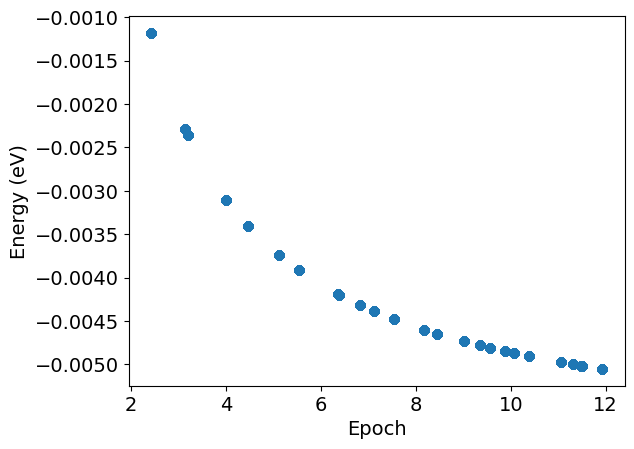

-0.050121303775669625 -0.03404523837710656


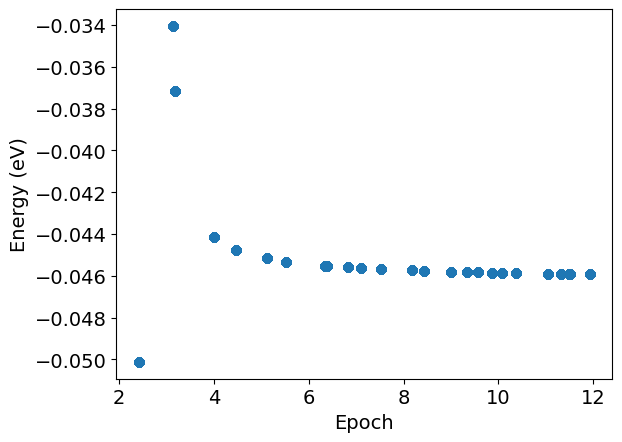

-0.09528680951872262 -3.503526799966451e-05


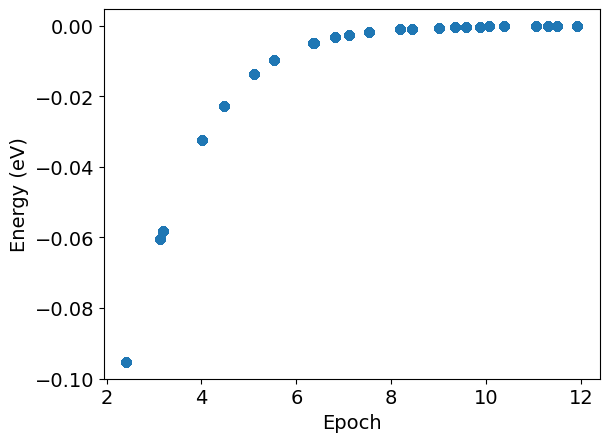

-0.05041881225365641 -0.02574528840605857


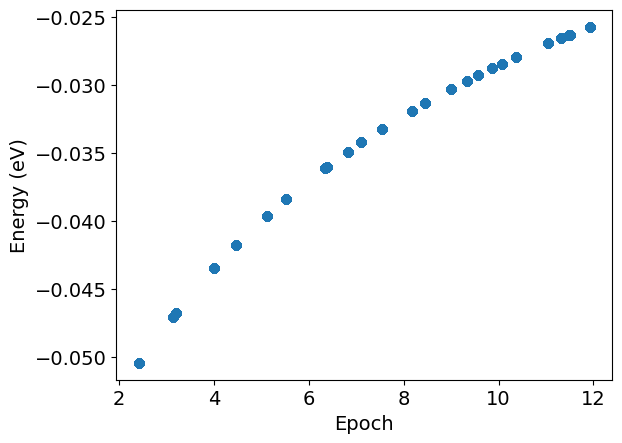

-0.9781522312797011 -0.0004601140992755446


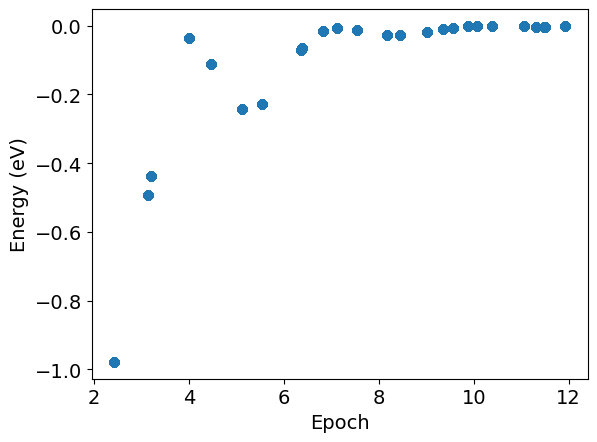

-0.7494296225682524 -5.319295978733634e-05


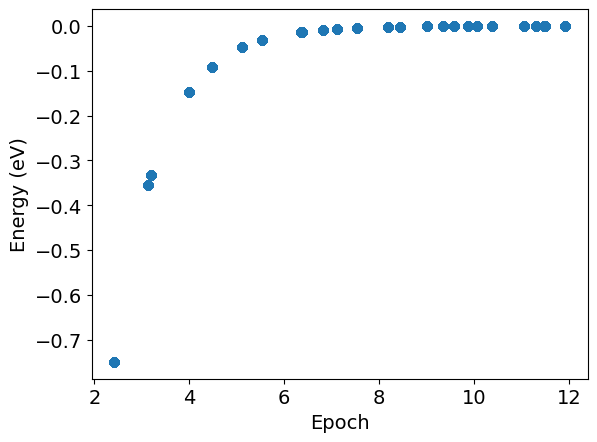

-0.015264949055554873 -0.0019374035994533384


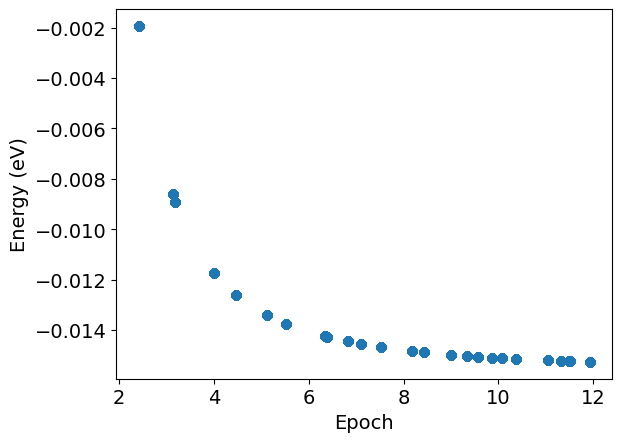

-0.01698427044816047 -0.003520512322438426


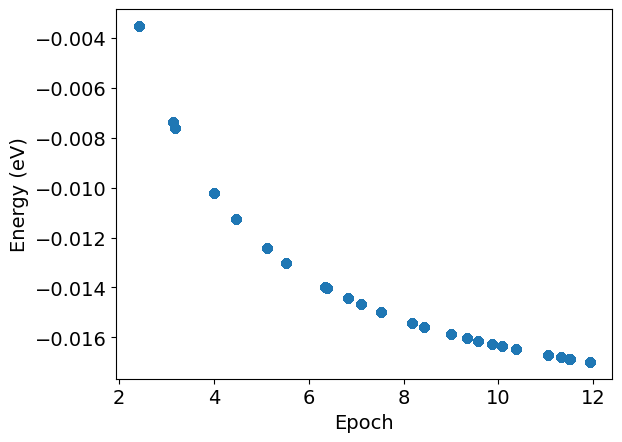

-0.03824450012241477 0.001533891904917902


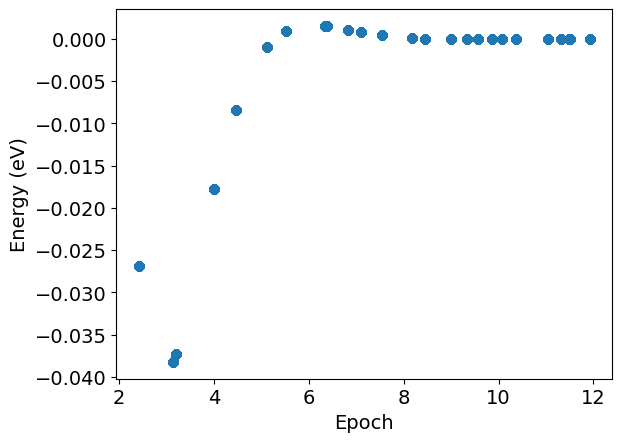

-7.326175342351223e-08 0.013950881198482737


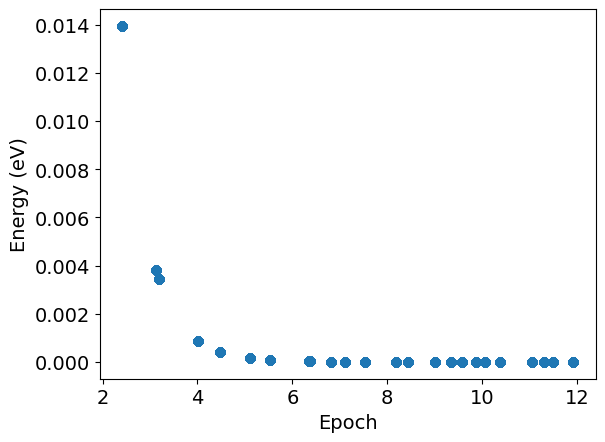

In [58]:
for func in all_funcs:
    values = []
    for dist in new_dists:
        values.append(function_calc.__getattribute__(abiba, func)(dist))
    print(min(values), max(values))
    plt.scatter(new_dists, values)
    plt.xlabel("Epoch")
    plt.ylabel("Energy (eV)")
    plt.show()

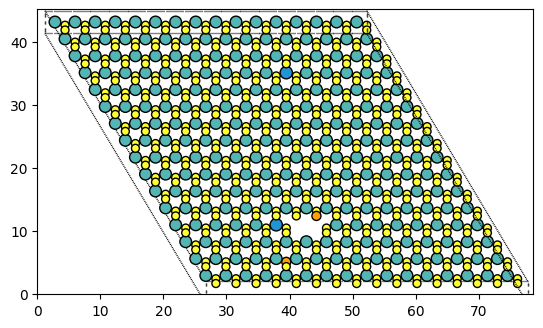

In [357]:
best_set = batch_op[1].members[6]
print_atom_structure(create_printable_structure_MoS2(structure, best_set))

In [358]:
best_set.get_energy(debug=True)

8 3.1903157850750894 -0.03725925512349148
2 6.823050916807838 -0.003282420181343158
5 3.1903156999999993 -0.33329041871678666
2 4.002459370980892 -0.03232286423633371
8 24.917162161964917 1.0683855276675959e-11
4 2.4169333360037606 -0.9781522312797009
4 2.416933336003761 -0.9781522312797009
6 6.823050817359514 -0.014445189940834656
8 6.380631485075089 0.0015122172312582397
6 6.823050877028507 -0.014445189963241891
9 24.91716216741129 -9.402179226893038e-15
7 5.118378109105471 -0.012433698374171765
7 5.118378109105472 -0.012433698374171765
2 8.179868823714934 -0.001013219107469698
0 10.069681261863092 -0.004872332900708857
6 28.637225771039944 -0.015565773524237962
1 7.106891682527894 -0.04564092677935785
1 6.380631400000003 -0.04553222053047691
2 2.4169336728972426 -0.09528679069913419
8 25.322345837954845 9.347981768176829e-12
4 2.4169336728972413 -0.9781521819934399
4 2.4169336728972426 -0.9781521819934401
6 23.56819316269674 -0.015536871130022313
1 3.190315700000001 -0.0371455930851

1.9580691008492779

In [359]:
def get_atom_from_cords(coords, structure):
    for idx, atom in enumerate(structure):
        if (abs(atom.coords - coords) < 0.01).all():
            yield idx, atom

In [360]:
def get_atom_id(coords, structure):
    return list(get_atom_from_cords(coords, structure))[0][0]

In [361]:
def get_matrices_coords(id):
    return tuple(arr[0] for arr in np.where(matrices == id)[:3])

In [362]:
get_atom_id((0.042, 0.333, 0.25),structure)

IndexError: list index out of range

In [ ]:
get_matrices_coords(get_atom_id((0.042, 0.333, 0.25),structure))

In [ ]:
d0 = Defect(1, get_matrices_coords(get_atom_id((0.042, 0.333, 0.25),structure)))
d1 = Defect(0, get_matrices_coords(get_atom_id((0.208, 0.167, 0.145),structure)))
d2 = Defect(2, get_matrices_coords(get_atom_id((0.083333, 0.291667, 0.355174),structure)))
d_set = DefectSet(eval_function)
d_set.add_defect(d0)
d_set.add_defect(d1)
d_set.add_defect(d2)
d_set.get_energy(debug=True) # 3.283003

In [ ]:
d0 = Defect(1, get_matrices_coords(get_atom_id((0.667,  0.333,  0.25),structure)))
d1 = Defect(0, get_matrices_coords(get_atom_id((0.333,  0.667,  0.145),structure)))
d2 = Defect(0, get_matrices_coords(get_atom_id((0.958,  0.042,  0.145),structure)))
d_set = DefectSet(eval_function)
d_set.add_defect(d0)
d_set.add_defect(d1)
d_set.add_defect(d2)
d_set.get_energy(debug=True) # 4.151911

In [ ]:
d0 = Defect(2, get_matrices_coords(get_atom_id((0.833333,  0.916667,  0.144826),structure)))
d1 = Defect(2, get_matrices_coords(get_atom_id((0.958333,  0.291667,  0.355174),structure)))
d_set = DefectSet(eval_function)
d_set.add_defect(d0)
d_set.add_defect(d1)
d_set.get_energy(debug=True) # 0.289753

In [ ]:
d0 = Defect(1, get_matrices_coords(get_atom_id((0.792,  0.208,  0.25),structure)))
d1 = Defect(0, get_matrices_coords(get_atom_id((0.208,  0.917,  0.145),structure)))
d2 = Defect(0, get_matrices_coords(get_atom_id((0.208,  0.667,  0.355),structure)))
d_set = DefectSet(eval_function)
d_set.add_defect(d0)
d_set.add_defect(d1)
d_set.add_defect(d2)
d_set.get_energy(debug=True) # 4.140348

In [43]:
import os
if 'ROLOS_AVAILABLE_CPU' in os.environ:
    for variable in ("MKL_NUM_THREADS", "NUMEXPR_NUM_THREADS", "OMP_NUM_THREADS", "VECLIB_MAXIMUM_THREADS", "OPENBLAS_NUM_THREADS"):
        os.environ[variable] = os.environ['ROLOS_AVAILABLE_CPU']
    import torch
    torch.set_num_threads(int(os.environ['ROLOS_AVAILABLE_CPU']))

In [184]:
%matplotlib widget
from pathlib import Path
import pickle
import yaml
import sys
import zipfile
import numpy as np
import pandas as pd
from tqdm.auto import tqdm, trange
from pymatgen.core.structure import Structure
from pymatgen.io.ase import AseAtomsAdaptor
from pymatgen.io.cif import CifParser

import matplotlib
import ipywidgets as widgets
import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms
from collections import defaultdict
import io

from MEGNetSparse import convert_to_sparse_representation, MEGNetTrainer

sys.path.append("..")
from ai4m.ai4mat.data.data import get_unit_cell, StorageResolver, read_defects_descriptions
from ai4m.ai4mat.common.random_defect_generation import generate_structure_with_random_defects, InconsistentDefectCount
from ai4m.ai4mat.common.eos import EOS

In [185]:
training_experiment = "combined_mixed_all_train"
model_names = {
    "formation_energy_per_site": "megnet_pytorch/sparse/05-12-2022_19-50-53/d6b7ce45",
    "homo_lumo_gap_min": "megnet_pytorch/sparse/05-12-2022_19-50-53/831cc496"}

predictors = dict()
for target, trial_name in model_names.items():
    with open(StorageResolver()["trials"] / f"{trial_name}.yaml", "r") as f:
        config = yaml.safe_load(f)

    predictors[target] = MEGNetTrainer(config['model_params'], 'cpu')
    predictors[target].load(StorageResolver()["checkpoints"] / training_experiment / target / trial_name / "0.pth",
                            map_location='cpu')

/home/lepip/.local/lib/python3.8/site-packages/torch/optim/lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


No optimizer parameters found
No optimizer parameters found


In [190]:
experiment_path = StorageResolver()["experiments"].joinpath(training_experiment)
with open(Path(experiment_path, "config.yaml")) as experiment_file:
    experiment_config = yaml.safe_load(experiment_file)
# We don't check how the data are split inside the experiment
# It's the user's responsibility to ensure that the model works on all datasets mentioned
training_datasets = experiment_config["datasets"]

# Computing EOS takes around a minute, so we use the cache
inference_unit_cells_file = StorageResolver()["others"] / "inference_unit_cells_cache.pkl.gz"
unit_cells_loaded = False
try:
    with open(inference_unit_cells_file, 'rb') as f:
        unit_cells, unit_cells_EOS = pickle.load(f)
    unit_cells_loaded = True
    print("Loaded unit cells from cache")
except Exception as inst:
    print(inst)
    print("Can't load unit cells from cache, generating them")
    unit_cells_EOS = dict()
    unit_cells = dict()

defects_list = []
for dataset in tqdm(training_datasets):
    defects = read_defects_descriptions(StorageResolver()["csv_cif"] / dataset)
    materials = defects.base.unique()
    assert len(materials) == 1
    material = materials[0]
    cell = defects.cell.unique()
    assert len(cell) == 1
    cell = cell[0]
    # We have two MoS2/WSe2 unit cells with slightly different height,
    # both are valid and there is no need to include them here
    if not unit_cells_loaded:
        unit_cells[material] = get_unit_cell(StorageResolver()["csv_cif"] / dataset, materials)[material]
        unit_cells_EOS[material] = EOS().get_augmented_struct(unit_cells[material])
    defects_list.append(defects)
if not unit_cells_loaded:
    with open(inference_unit_cells_file, 'wb') as f:
        pickle.dump((unit_cells, unit_cells_EOS), f)
defects_pd = pd.concat(defects_list, axis=0)
if 'pbc' in defects_pd.columns:
    defects_pd = defects_pd.drop(columns=['pbc'])

Loaded unit cells from cache


  0%|          | 0/8 [00:00<?, ?it/s]

In [191]:
from itertools import chain
from collections import namedtuple
SubstitutionDefect = namedtuple('substitution_defect', ['type', 'from_', 'to'])
VacancyDefect = namedtuple('vacancy_defect', ['type', 'element'])
def to_named_tuple(dict_):
    if dict_['type'] == 'substitution':
        return SubstitutionDefect(dict_['type'], dict_['from'], dict_['to'])
    elif dict_['type'] == 'vacancy':
        return VacancyDefect(**dict_)
    else:
        raise ValueError(f"Unknown defect type {dict_['type']}")
available_defects = defects_pd.groupby(['base', 'cell']).apply(lambda x: set(map(to_named_tuple, chain(*x.defects))))

TypeError: 'DefectSet' object is not callable

In [192]:
defects_pd

,description,base,cell,defects
_id,,,,
5106743f-06b3-4e57-8ee6-5cdf4ed14dc5,P141N1,P,"(6, 6, 1)","[{'type': 'vacancy', 'element': 'P'}, {'type':..."
851b0d44-b9af-41e1-b1ec-925daf419aae,P141,P,"(6, 6, 1)","[{'type': 'vacancy', 'element': 'P'}, {'type':..."
3765801f-e8c7-4e1e-8705-da03ef64f59c,P141N3,P,"(6, 6, 1)","[{'type': 'substitution', 'from': 'P', 'to': '..."
72c75217-369a-483e-88f6-86c3edaaf8af,P141N2,P,"(6, 6, 1)","[{'type': 'substitution', 'from': 'P', 'to': '..."
bfdd9f72-3d2b-435c-b9df-80b283befc68,P137N2,P,"(6, 6, 1)","[{'type': 'vacancy', 'element': 'P'}, {'type':..."
...,...,...,...,...
619cdd9644389dee486ade40,S2,WSe2,"(8, 8, 1)","[{'type': 'substitution', 'from': 'W', 'to': '..."
619cdd9644389dee486ade41,S3,WSe2,"(8, 8, 1)","[{'type': 'substitution', 'from': 'W', 'to': '..."
619cdd9644389dee486ade42,S4,WSe2,"(8, 8, 1)","[{'type': 'substitution', 'from': 'W', 'to': '..."


In [188]:
reference_supercells = dict()
for material in available_defects.index:
    reference_supercells[material] = unit_cells[material[0]].copy()
    reference_supercells[material].make_supercell(material[1])

NameError: name 'available_defects' is not defined

In [49]:
material_labels = list(map(lambda x: f"{x[0]}, {x[1][0]}x{x[1][1]} supercell", available_defects.index))

In [50]:
def get_label(defect_tuple):
    if defect_tuple.type == 'substitution':
        return f"{defect_tuple.from_} -> {defect_tuple.to}"
    elif defect_tuple.type == 'vacancy':
        return f"{defect_tuple.element} vacancy"
    else:
        raise ValueError(f"Unknown defect type {defect_tuple.type}")

In [51]:
base_selection = widgets.RadioButtons(options=zip(material_labels, available_defects.index), description='Base material')
total_structures_selection = widgets.IntSlider(min=1, max=100, step=1, value=100)
total_defects_selection = widgets.IntSlider(min=0, max=15, step=1, value=1)
max_defect_counts_selection = dict()

structure_plots_output = widgets.Output()
rng = np.random.default_rng(42)
image_widget = widgets.Image(format='png', width=700, height=300,
                             layout=widgets.Layout(object_fit='contain'))

reference_atoms = dict()
for material, supercell in reference_supercells.items():
    reference_atoms[material] = AseAtomsAdaptor.get_atoms(supercell)

def read_max_defect_counts_selection():
    """
    Reads the widget and returns a dict with max defect counts for each defect type
    suitable for the generate_structure_with_random_defects function
    """
    max_defect_counts = defaultdict(dict)
    for defect, count_widget in max_defect_counts_selection.items():
        if defect.type == 'substitution':
            max_defect_counts[defect.from_][defect.to] = count_widget.value
        else:
            max_defect_counts[defect.element]["Vacancy"] = count_widget.value
    return max_defect_counts

def plot_structures():
    base_material = base_selection.value
    max_defect_counts = read_max_defect_counts_selection()
    backend = matplotlib.get_backend()
    try:
        matplotlib.use('agg')
        fig, axes = plt.subplots(1, 2, figsize=(7, 3), dpi=300, layout="constrained")
        try:
            example_defect = generate_structure_with_random_defects(total_defects_selection.value, max_defect_counts,
                                                                    reference_supercells[base_material], rng, False)
            atoms = AseAtomsAdaptor.get_atoms(example_defect)
            plot_atoms(atoms, ax=axes[1])
        except InconsistentDefectCount:
            axes[1].text(0.5, 0.5,
                    "Can't generate the requested number of defects,\nincrease the max counts",
                    horizontalalignment='center', verticalalignment='center')
        
        plot_atoms(reference_atoms[base_material], ax=axes[0])
        axes[0].set_title("Pristine structure")
        axes[1].set_title("Example structure with defects")
        for ax in axes:
            ax.set_axis_off()
        img_buf = io.BytesIO()
        fig.savefig(img_buf, format='png')
        plt.close(fig)
        image_widget.value = img_buf.getvalue()
    finally:
        matplotlib.use(backend)

def prepare_defect_sliders(base_material):
    max_defect_counts_selection.clear()
    for defect in available_defects[base_material]:
        max_defect_counts_selection[defect] = widgets.IntSlider(min=0, max=15, step=1, value=1, description=get_label(defect))
        max_defect_counts_selection[defect].observe(plot_structures_watcher)

    controls.children = [base_selection,
                         widgets.Label("Max counts for each defect type:"),
                         *max_defect_counts_selection.values(),
                         widgets.Label("Total defects:"),
                         total_defects_selection,
                         widgets.Label("Total structures to generate:"),
                         total_structures_selection]
    plot_structures()

def select_defects(change):
    if change['type'] == 'change' and change['name'] == 'value':
        prepare_defect_sliders(change['owner'].value)

def plot_structures_watcher(change):
    if change['type'] == 'change' and change['name'] == 'value':
        plot_structures()

base_selection.observe(select_defects)

controls = widgets.VBox([base_selection])
interface = widgets.HBox([controls, image_widget])
prepare_defect_sliders(base_selection.value)
total_defects_selection.observe(plot_structures_watcher)
display(interface)

In [52]:
base_material = base_selection.value
# material = ('MoS2', (8, 8, 1))
# material should be a tuple of (formula, supercell_size) from available_defects.index
# The models don't generalise to chemically different materials
# Generalising to different supercell sizes is possible but not well tested
if material not in available_defects.index:
    raise ValueError(f"Unknown material {material}, use one in \n{available_defects.index}")

# The number of point defects your structures will have
total_defects = total_defects_selection.value
# total_defects = 3

# The maximum number of each defect type your structures will have
max_defect_counts = read_max_defect_counts_selection()
# max_defect_counts = {'S': {'Se': 1, 'Vacancy': 1}, 'Mo': {'Vacancy': 1, 'W': 1}}

# The number of structures to generate
total_structures = total_structures_selection.value
# total_structures = 100

In [53]:
reference_supercell = reference_supercells[base_material]
structures = []
for i in trange(total_structures):
    structures.append(generate_structure_with_random_defects(total_defects, max_defect_counts,
                                                             reference_supercell, rng, False))

  0%|          | 0/100 [00:00<?, ?it/s]

In [54]:
reference_supercells = dict()
for material in available_defects.index:
    reference_supercells[material] = unit_cells[material[0]].copy()
    reference_supercells[material].make_supercell(material[1])

In [166]:
# Compute the sparse representations
sparse_structures = []
for set in tqdm(best_sets):
    print(type(unit_cells_EOS[base_material[0]]), type(base_material))
    sparse_structures.append(
        convert_to_sparse_representation(
            create_printable_structure_MoS2(structure, set), 
            unit_cells_EOS[base_material[0]], 
            base_material[1],
            skip_eos=True,
            copy_unit_cell_properties=True
        )
    )

  0%|          | 0/20 [00:00<?, ?it/s]

<class 'pymatgen.core.structure.Structure'> <class 'tuple'>
<class 'pymatgen.core.structure.Structure'> <class 'tuple'>
<class 'pymatgen.core.structure.Structure'> <class 'tuple'>
<class 'pymatgen.core.structure.Structure'> <class 'tuple'>
<class 'pymatgen.core.structure.Structure'> <class 'tuple'>
<class 'pymatgen.core.structure.Structure'> <class 'tuple'>
<class 'pymatgen.core.structure.Structure'> <class 'tuple'>
<class 'pymatgen.core.structure.Structure'> <class 'tuple'>
<class 'pymatgen.core.structure.Structure'> <class 'tuple'>
<class 'pymatgen.core.structure.Structure'> <class 'tuple'>
<class 'pymatgen.core.structure.Structure'> <class 'tuple'>
<class 'pymatgen.core.structure.Structure'> <class 'tuple'>


/home/lepip/.local/lib/python3.8/site-packages/pymatgen/core/structure.py:757: UserWarning: Not all sites have property was. Missing values are set to None.
  warnings.warn(f"Not all sites have property {k}. Missing values are set to None.")


<class 'pymatgen.core.structure.Structure'> <class 'tuple'>
<class 'pymatgen.core.structure.Structure'> <class 'tuple'>
<class 'pymatgen.core.structure.Structure'> <class 'tuple'>
<class 'pymatgen.core.structure.Structure'> <class 'tuple'>
<class 'pymatgen.core.structure.Structure'> <class 'tuple'>
<class 'pymatgen.core.structure.Structure'> <class 'tuple'>
<class 'pymatgen.core.structure.Structure'> <class 'tuple'>
<class 'pymatgen.core.structure.Structure'> <class 'tuple'>


In [167]:
predictions = pd.DataFrame(columns=["structure", "sparse_structure"] + list(predictors.keys()))
predictions["structure"] = [create_printable_structure_MoS2(structure, best_sets[i]) for i in range(len(best_sets))]
predictions["sparse_structure"] = sparse_structures
for target, predictor in predictors.items():
    start_time = time.time()
    predictions[target] = predictor.predict_structures(sparse_structures)
    print("--- %s seconds ---" % (time.time() - start_time))

converting data


100%|██████████| 20/20 [00:00<00:00, 8412.16it/s]


--- 0.043128252029418945 seconds ---
converting data


100%|██████████| 20/20 [00:00<00:00, 9823.88it/s]

--- 0.05072331428527832 seconds ---


In [168]:
predictions

,structure,sparse_structure,formation_energy_per_site,homo_lumo_gap_min
0,"[[-1.59515772 4.604824 3.719751 ] Mo, [-3...","[[0.01276126 1.83456191 3.719751 ] X0+, [1.58...",3.137312,0.143960
1,"[[-1.59515772 4.604824 3.719751 ] Mo, [-3...","[[0.01276126 1.83456191 3.719751 ] X0+, [1.58...",3.137312,0.143960
2,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,"[[-3.17755444 12.88613968 3.719751 ] X0+, [1...",3.296032,0.256775
3,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,"[[-3.17755444 12.88613968 3.719751 ] X0+, [1...",3.296032,0.256775
4,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,"[[ 7.98855051 10.12324524 3.719751 ] X0+, [1...",3.294498,0.263450
5,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,"[[ 7.98855051 10.12324524 3.719751 ] X0+, [1...",3.294498,0.263450
6,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,"[[ 7.98855051 10.12324524 3.719751 ] X0+, [1...",3.294498,0.263450
7,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,"[[ 7.98855051 10.12324524 3.719751 ] X0+, [1...",3.294498,0.263450
8,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,"[[ 3.20307696 18.41192856 3.719751 ] X0+, [1...",3.295121,0.259584
9,[[1.27612629e-07 1.84192955e+00 3.71975100e+00...,"[[ 3.20307696 18.41192856 3.719751 ] X0+, [1...",3.295121,0.259584


Text(0, 0.5, 'Batch energy')

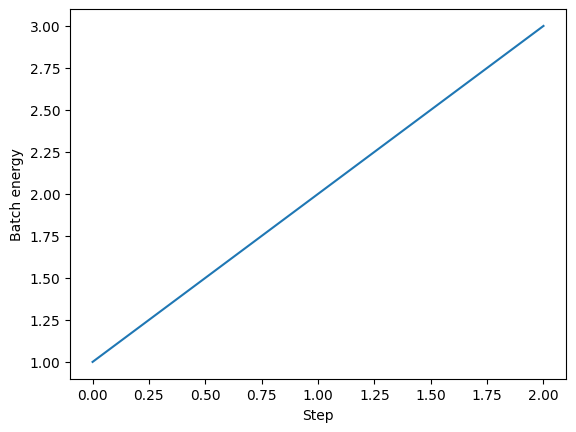

In [80]:
plt.plot([1, 2, 3])
plt.xlabel('Step')
plt.ylabel('Batch energy')